In [1]:
%matplotlib inline
%matplotlib notebook
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/births.csv")

In [3]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
len(df)

15547

In [5]:
# suupresion des NaNs 
df = df.dropna()

In [6]:
dict_to_convert = {'year':df.year, 'month':df.month, 'day':df.day}
dict_to_convert

{'year': 0        1969
 1        1969
 2        1969
 3        1969
 4        1969
          ... 
 15062    1988
 15063    1988
 15064    1988
 15065    1988
 15066    1988
 Name: year, Length: 15067, dtype: int64,
 'month': 0         1
 1         1
 2         1
 3         1
 4         1
          ..
 15062    12
 15063    12
 15064    12
 15065    12
 15066    12
 Name: month, Length: 15067, dtype: int64,
 'day': 0         1.0
 1         1.0
 2         2.0
 3         2.0
 4         3.0
          ... 
 15062    29.0
 15063    30.0
 15064    30.0
 15065    31.0
 15066    31.0
 Name: day, Length: 15067, dtype: float64}

In [7]:
np.where((pd.to_datetime(dict_to_convert,'coerce'))=='NaT')  # coerce raise ignore

(array([], dtype=int64),)

In [8]:
data_time = pd.to_datetime(dict_to_convert,'coerce')  # coerce raise ignore

In [9]:
type(data_time)

pandas.core.series.Series

In [10]:
# get week day 
df_dayofweek = ({ 'dayofweek' : data_time.dt.dayofweek })
df_dayofweek

{'dayofweek': 0        2.0
 1        2.0
 2        3.0
 3        3.0
 4        4.0
         ... 
 15062    3.0
 15063    4.0
 15064    4.0
 15065    5.0
 15066    5.0
 Length: 15067, dtype: float64}

In [11]:
#df1 = 
df.insert(2,"dayofweek",data_time.dt.dayofweek, True)
#df.loc['dayofweek'] = data_time.dt.dayofweek

In [41]:
df = df.dropna() # des jours ne sont pas valides j ai l impression

In [42]:
df

,year,month,dayofweek,day,gender,births
0,1969,1,2.0,1.0,F,4046
1,1969,1,2.0,1.0,M,4440
2,1969,1,3.0,2.0,F,4454
3,1969,1,3.0,2.0,M,4548
4,1969,1,4.0,3.0,F,4548
...,...,...,...,...,...,...
15062,1988,12,3.0,29.0,M,5944
15063,1988,12,4.0,30.0,F,5742
15064,1988,12,4.0,30.0,M,6095
15065,1988,12,5.0,31.0,F,4435


In [43]:
bins = df.year.unique()
bins

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988])

In [79]:
print(len(df))
print(730+7304+6576) 

14610
14610


In [80]:
# 1 janv. 1970 – 31 déc. 1979
# 1980  1 janv. 1980 – 31 déc. 1989

d_60 = []
d_70 = []
d_80 = []
decade = []
for index, row in df.iterrows():
    # On va raisonner a decoupe en extraire 
    if row['year'] < 1970:
        decade.append(1960)
        d_60.append([df.dayofweek[index] , df.births[index]])
    if row['year'] >1969 and row['year']< 1980 :
        decade.append(1970)
        d_70.append([df.dayofweek[index] , df.births[index]])
    if row['year'] >1979 and row['year']< 1990 :
        decade.append(1980)
        d_80.append([df.dayofweek[index] , df.births[index]])
#d_60[ df['year'] < 1970 ] 
print(len(d_60),len(d_70),len(d_80))

730 7304 6576


In [81]:
# Rajouter les decades dans le dataframe
df['decade'] = pd.Series(decade, index=df.index)

In [82]:
df

,year,month,dayofweek,day,gender,births,decade
0,1969,1,2.0,1.0,F,4046,1960
1,1969,1,2.0,1.0,M,4440,1960
2,1969,1,3.0,2.0,F,4454,1960
3,1969,1,3.0,2.0,M,4548,1960
4,1969,1,4.0,3.0,F,4548,1960
...,...,...,...,...,...,...,...
15062,1988,12,3.0,29.0,M,5944,1980
15063,1988,12,4.0,30.0,F,5742,1980
15064,1988,12,4.0,30.0,M,6095,1980
15065,1988,12,5.0,31.0,F,4435,1980


In [58]:
arr_60 = np.array(d_60)

(array([2., 2., 3., 3., 4., 4., 5., 5., 6., 6., 0., 0., 1., 1., 2., 2., 3.,
        3., 4., 4., 5., 5., 6., 6., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4.,
        5., 5., 6., 6., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6.,
        6., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 6., 0., 0.,
        1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 6., 0., 0., 1., 1., 2.,
        2., 3., 3., 4., 4., 5., 5., 6., 6., 0., 0., 1., 1., 2., 2., 3., 3.,
        4., 4., 5., 5., 6., 6., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5.,
        5., 6., 6., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 6.,
        0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 6., 0., 0., 1.,
        1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 6., 0., 0., 1., 1., 2., 2.,
        3., 3., 4., 4., 5., 5., 6., 6., 0., 0., 1., 1., 2., 2., 3., 3., 4.,
        4., 5., 5., 6., 6., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5.,
        6., 6., 0., 0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 6., 0.,
        0., 

<IPython.core.display.Javascript object>


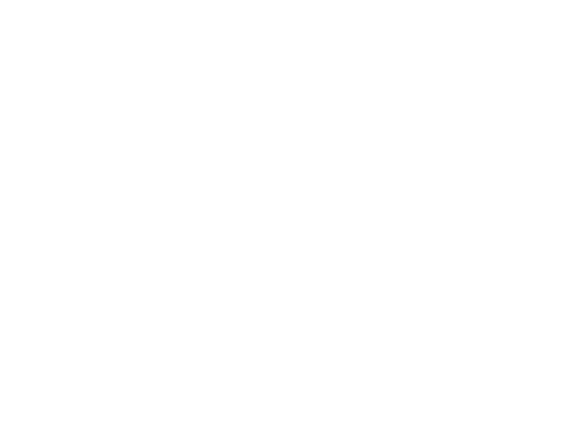

In [76]:
import seaborn as sns
sns.set(style="whitegrid")
fig=plt.figure(figsize=(8,6))
#fig,axs=plt.subplots(1,2,sharey=True,tight_layout=True)
#ax = ax.bar( d_60[:,0], d_60[:,1])
#axs[0].hist(arr_60[:,0])
#fig.bar(arr_60[:,0], arr_60[:,1])
# trois graphiques a faire pour 
# 1960 -> 1969 
# 1970 -> 1979  
# 1980 -> 1989  
# bizare on a les donnée que 
#fig,ax = plt.subplots(1,1,figsize=(6,3),dpi=100,num=1)

#ax = df.plot.bar(x='dayofweek', y = 'births', rot=0)
#plt.show()



<IPython.core.display.Javascript object>


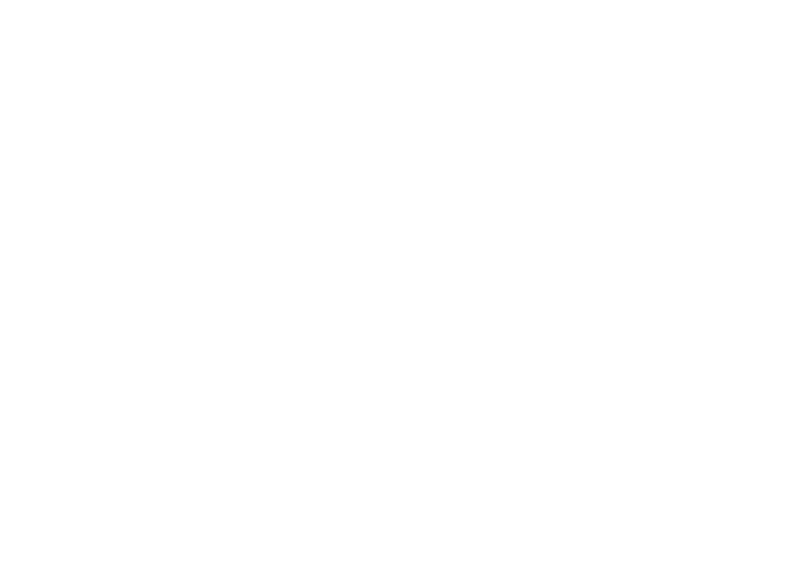

<IPython.core.display.Javascript object>


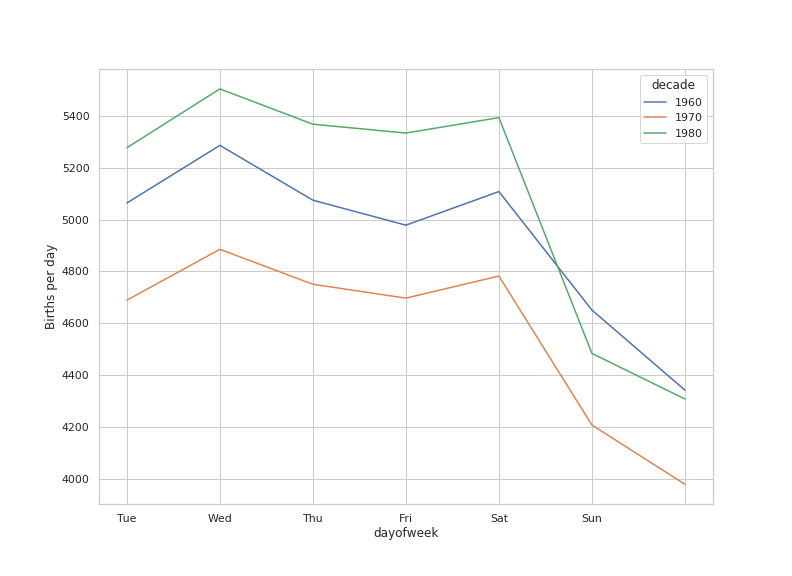

In [86]:
fig=plt.figure(figsize=(11,8))
births_per_day=df.pivot_table('births', index='dayofweek',columns='decade', aggfunc='mean')
# ok se servir de pivot_table noter bien pratique
births_per_day.plot(figsize=(11,8))
plt.gca().set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.ylabel('Births per day');